In [11]:
import pickle
import matplotlib.pyplot as plt

In [90]:
with open('/app/data/400_minute_train.pkl', 'rb') as f:
    l_400 = pickle.load(f)
with open('/app/data/4000_minute_train.pkl', 'rb') as f:
    l_4000 = pickle.load(f)
with open('/app/data/40000_minute_train.pkl', 'rb') as f:
    l_40000 = pickle.load(f)
with open('/app/data/all_videos_train.pkl', 'rb') as f:
    l_all = pickle.load(f)

In [7]:
def compute_datapoints(l):
    num_points = 0
    for k in l:
        for seg in l[k]:
            num_points += (seg[1] - seg[0]) / 8
    
    return int(num_points)

In [76]:
resnet_trained_clipshots = 0.898
resnet_trained_gt = 0.801
heuristic_F1 = 0.876
# (minutes of data, data points, F1)
unlabelled_perf = [
    (36, 5862, 0.8234),
    (400, compute_datapoints(l_400), 0.8582),
    (4000, compute_datapoints(l_4000), 0.894),
    (40000, compute_datapoints(l_40000), .9056)
]
majority_vote = 0.866
labelmodel = 0.849

In [77]:
unlabelled_perf

[(36, 5862, 0.8234),
 (400, 35285, 0.8582),
 (4000, 345968, 0.894),
 (40000, 3504667, 0.9056)]

In [88]:
# graph datapoints vs. F1
def graph_weak():
    X_weak = [
        p[0]
        for p in unlabelled_perf
    ]
    Y_weak = [
        p[2]
        for p in unlabelled_perf
    ]

    fig, ax = plt.subplots()
    ax.plot(X_weak, Y_weak, label='DeepSBD trained on weak labels', marker='o')
    ax.axhline(resnet_trained_clipshots, linestyle = '--', color='r',
               label='DeepSBD trained on ClipShots (4k-80k minutes)')
    ax.axhline(heuristic_F1, linestyle = '--', color='g',
              label='Heuristic baseline (tuned on 15 minutes)')
    ax.axhline(majority_vote, linestyle = '--', color='k',
              label='Majority vote of LFs (tuned on 15 minutes)')
    ax.axhline(labelmodel, linestyle = '--', color='purple',
              label='LabelModel (4,000 minutes)')
    ax.axhline(resnet_trained_gt, linestyle = '--', color='orange',
              label='DeepSBD trained on movie GT (~36 minutes)')

    ax.set_xlabel('Minutes of unlabelled data')
    ax.set_ylabel('F1')
    # ax.set_xscale("log", nonposy='clip')
    ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#     ax.set_xlim(left=0)
    ax.set_title('Performance of DeepSBD shot detection trained on weak data')

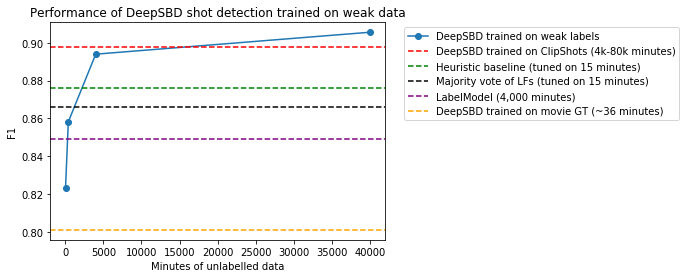

In [89]:
graph_weak()

In [162]:
unlabelled_perf_v1 = ([
    (36, 5862, 0.8234),
    (400, compute_datapoints(l_400), 0.8582),
    (4000, compute_datapoints(l_4000), 0.894),
    (40000, compute_datapoints(l_40000), .9056),
    (72000, compute_datapoints(l_all), .9109)
], 'DeepSBD trained on LabelModel (12k minutes untuned)')

In [163]:
unlabelled_perf_v1

([(36, 5862, 0.8234),
  (400, 35285, 0.8582),
  (4000, 345968, 0.894),
  (40000, 3504667, 0.9056),
  (72000, 11759322, 0.9109)],
 'DeepSBD trained on LabelModel (12k minutes untuned)')

In [164]:
label_model_1 = (0.8249, 'Label Model (12k minutes untuned)')

In [96]:
unlabelled_perf_v2 = ([
    (36, 5862, 0.8246),
    (400, compute_datapoints(l_400), 0.8369),
    (4000, compute_datapoints(l_4000), 0.878)
], 'DeepSBD trained on LabelModel (72k minutes tuned)')

In [97]:
label_model_2 = (0.866, 'LabelModel (72k minutes tuned)')

In [153]:
unlabelled_perf_v3 = ([
    (36, 5862, 0.8138),
    (400, compute_datapoints(l_400), 0.8468),
    (4000, compute_datapoints(l_4000), 0.8882)
], 'DeepSBD trained on LabelModel (high precision, 72k minutes tuned)')

In [154]:
label_model_3 = (0.834, 'LabelModel (high precision, 72k minutes tuned)')

In [177]:
unlabelled_perf_v4 = ([
    (36, 5862, 0.8397),
    (400, compute_datapoints(l_400), 0.8511),
    (4000, compute_datapoints(l_4000), 0.8791)
], 'DeepSBD trained on heuristic baseline')

In [175]:
X_1 = [ p[0] for p in unlabelled_perf_v1[0] ]
Y_1 = [ p[2] for p in unlabelled_perf_v1[0] ]
label_1 = unlabelled_perf_v1[1]

X_2 = [ p[0] for p in unlabelled_perf_v2[0] ]
Y_2 = [ p[2] for p in unlabelled_perf_v2[0] ]
label_2 = unlabelled_perf_v2[1]

X_3 = [ p[0] for p in unlabelled_perf_v3[0] ]
Y_3 = [ p[2] for p in unlabelled_perf_v3[0] ]
label_3 = unlabelled_perf_v3[1]

X_4 = [ p[0] for p in unlabelled_perf_v4[0] ]
Y_4 = [ p[2] for p in unlabelled_perf_v4[0] ]
label_4 = unlabelled_perf_v4[1]

Text(0.5,1,'Performance of DeepSBD shot detection trained on weak data')

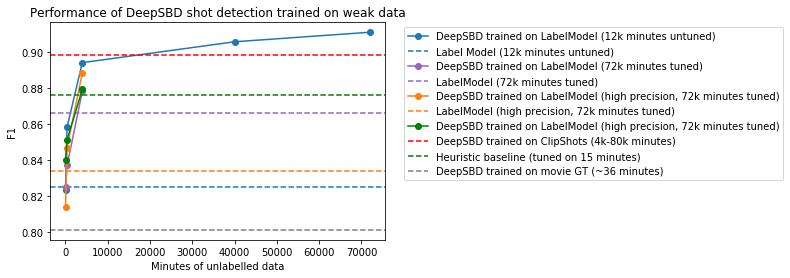

In [180]:
fig, ax = plt.subplots()
ax.plot(X_1, Y_1, label=label_1, marker='o', color='tab:blue')
ax.axhline(label_model_1[0], linestyle = '--', color='tab:blue', label=label_model_1[1])

ax.plot(X_2, Y_2, label=label_2, marker='o', color='tab:purple')
ax.axhline(label_model_2[0], linestyle = '--', color='tab:purple', label=label_model_2[1])

ax.plot(X_3, Y_3, label=label_3, marker='o', color='tab:orange')
ax.axhline(label_model_3[0], linestyle = '--', color='tab:orange', label=label_model_3[1])

ax.plot(X_4, Y_4, label=label_4, marker='o', color='g')

ax.axhline(resnet_trained_clipshots, linestyle = '--', color='r',
           label='DeepSBD trained on ClipShots (4k-80k minutes)')
ax.axhline(heuristic_F1, linestyle = '--', color='g',
          label='Heuristic baseline (tuned on 15 minutes)')
# ax.axhline(majority_vote, linestyle = '--', color='k',
#           label='Majority vote of LFs (tuned on 15 minutes)')
# ax.axhline(labelmodel, linestyle = '--', color='purple',
#           label='LabelModel (4,000 minutes)')
ax.axhline(resnet_trained_gt, linestyle = '--', color='tab:gray',
          label='DeepSBD trained on movie GT (~36 minutes)')

ax.set_xlabel('Minutes of unlabelled data')
ax.set_ylabel('F1')
# ax.set_xscale("log", nonposy='clip')
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#     ax.set_xlim(left=0)
ax.set_title('Performance of DeepSBD shot detection trained on weak data')

Text(0.5,1,'Performance of DeepSBD shot detection trained on weak data')

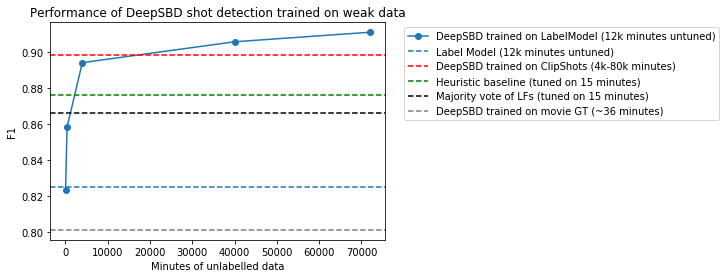

In [173]:
fig, ax = plt.subplots()
ax.plot(X_1, Y_1, label=label_1, marker='o', color='tab:blue')
ax.axhline(label_model_1[0], linestyle = '--', color='tab:blue', label=label_model_1[1])

# ax.plot(X_2, Y_2, label=label_2, marker='o', color='tab:purple')
# ax.axhline(label_model_2[0], linestyle = '--', color='tab:purple', label=label_model_2[1])

# ax.plot(X_3, Y_3, label=label_3, marker='o', color='tab:orange')
# ax.axhline(label_model_3[0], linestyle = '--', color='tab:orange', label=label_model_3[1])

# ax.plot(X_4, Y_4, label=label_4, marker='o', color='g')

ax.axhline(resnet_trained_clipshots, linestyle = '--', color='r',
           label='DeepSBD trained on ClipShots (4k-80k minutes)')
ax.axhline(heuristic_F1, linestyle = '--', color='g',
          label='Heuristic baseline (tuned on 15 minutes)')
ax.axhline(majority_vote, linestyle = '--', color='k',
          label='Majority vote of LFs (tuned on 15 minutes)')
# ax.axhline(labelmodel, linestyle = '--', color='purple',
#           label='LabelModel (4,000 minutes)')
ax.axhline(resnet_trained_gt, linestyle = '--', color='tab:gray',
          label='DeepSBD trained on movie GT (~36 minutes)')

ax.set_xlabel('Minutes of unlabelled data')
ax.set_ylabel('F1')
# ax.set_xscale("log", nonposy='clip')
# ax.set_ylim(top=.92)
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#     ax.set_xlim(left=0)
ax.set_title('Performance of DeepSBD shot detection trained on weak data')

Text(0.5,1,'DeepSBD shot detection trained on different LabelModels')

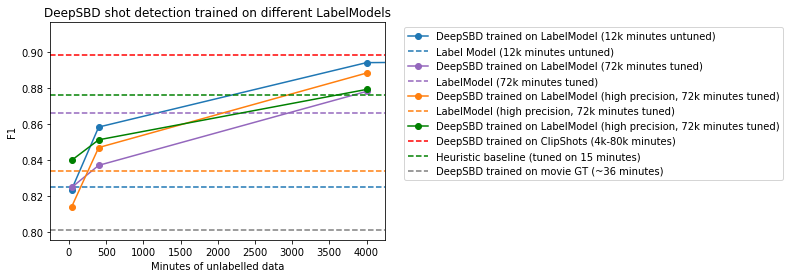

In [184]:
fig, ax = plt.subplots()
ax.plot(X_1, Y_1, label=label_1, marker='o', color='tab:blue')
ax.axhline(label_model_1[0], linestyle = '--', color='tab:blue', label=label_model_1[1])

ax.plot(X_2, Y_2, label=label_2, marker='o', color='tab:purple')
ax.axhline(label_model_2[0], linestyle = '--', color='tab:purple', label=label_model_2[1])

ax.plot(X_3, Y_3, label=label_3, marker='o', color='tab:orange')
ax.axhline(label_model_3[0], linestyle = '--', color='tab:orange', label=label_model_3[1])

ax.plot(X_4, Y_4, label=label_4, marker='o', color='g')

ax.axhline(resnet_trained_clipshots, linestyle = '--', color='r',
           label='DeepSBD trained on ClipShots (4k-80k minutes)')
ax.axhline(heuristic_F1, linestyle = '--', color='g',
          label='Heuristic baseline (tuned on 15 minutes)')
# ax.axhline(majority_vote, linestyle = '--', color='k',
#           label='Majority vote of LFs (tuned on 15 minutes)')
# ax.axhline(labelmodel, linestyle = '--', color='purple',
#           label='LabelModel (4,000 minutes)')
# ax.axhline(resnet_trained_gt, linestyle = '--', color='orange',
#           label='DeepSBD trained on movie GT (~36 minutes)')
ax.axhline(resnet_trained_gt, linestyle = '--', color='tab:gray',
          label='DeepSBD trained on movie GT (~36 minutes)')

ax.set_xlabel('Minutes of unlabelled data')
ax.set_ylabel('F1')
ax.set_xlim(left = -250, right = 4250)
# ax.set_xscale("log", nonposy='clip')
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#     ax.set_xlim(left=0)
ax.set_title('DeepSBD shot detection trained on different LabelModels')

Text(0.5,1,'DeepSBD shot detection, original LFs, tuned LabelModel')

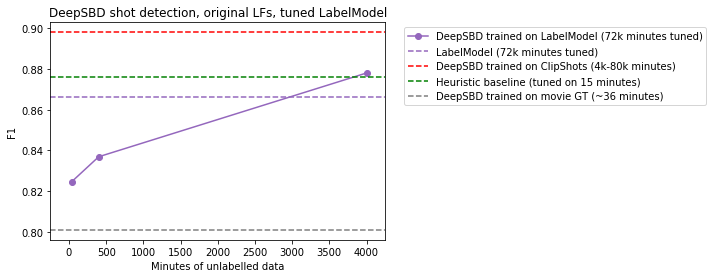

In [159]:
fig, ax = plt.subplots()
# ax.plot(X_1, Y_1, label=label_1, marker='o', color='tab:blue')
# ax.axhline(label_model_1[0], linestyle = '--', color='tab:blue', label=label_model_1[1])

ax.plot(X_2, Y_2, label=label_2, marker='o', color='tab:purple')
ax.axhline(label_model_2[0], linestyle = '--', color='tab:purple', label=label_model_2[1])

# ax.plot(X_3, Y_3, label=label_3, marker='o', color='tab:orange')
# ax.axhline(label_model_3[0], linestyle = '--', color='tab:orange', label=label_model_3[1])

# ax.plot(X_4, Y_4, label=label_4, marker='o', color='g')

ax.axhline(resnet_trained_clipshots, linestyle = '--', color='r',
           label='DeepSBD trained on ClipShots (4k-80k minutes)')
ax.axhline(heuristic_F1, linestyle = '--', color='g',
          label='Heuristic baseline (tuned on 15 minutes)')
# ax.axhline(majority_vote, linestyle = '--', color='k',
#           label='Majority vote of LFs (tuned on 15 minutes)')
# ax.axhline(labelmodel, linestyle = '--', color='purple',
#           label='LabelModel (4,000 minutes)')
# ax.axhline(resnet_trained_gt, linestyle = '--', color='orange',
#           label='DeepSBD trained on movie GT (~36 minutes)')
ax.axhline(resnet_trained_gt, linestyle = '--', color='tab:gray',
          label='DeepSBD trained on movie GT (~36 minutes)')

ax.set_xlabel('Minutes of unlabelled data')
ax.set_ylabel('F1')
ax.set_xlim(left = -250, right = 4250)
# ax.set_xscale("log", nonposy='clip')
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#     ax.set_xlim(left=0)
ax.set_title('DeepSBD shot detection, original LFs, tuned LabelModel')

Text(0.5,1,'DeepSBD shot detection, high-precision LFs, tuned LabelModel')

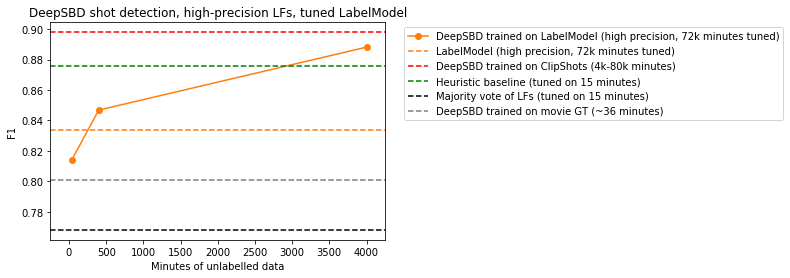

In [160]:
fig, ax = plt.subplots()
# ax.plot(X_1, Y_1, label=label_1, marker='o', color='tab:blue')
# ax.axhline(label_model_1[0], linestyle = '--', color='tab:blue', label=label_model_1[1])

# ax.plot(X_2, Y_2, label=label_2, marker='o', color='tab:purple')
# ax.axhline(label_model_2[0], linestyle = '--', color='tab:purple', label=label_model_2[1])

ax.plot(X_3, Y_3, label=label_3, marker='o', color='tab:orange')
ax.axhline(label_model_3[0], linestyle = '--', color='tab:orange', label=label_model_3[1])

# ax.plot(X_4, Y_4, label=label_4, marker='o', color='g')

ax.axhline(resnet_trained_clipshots, linestyle = '--', color='r',
           label='DeepSBD trained on ClipShots (4k-80k minutes)')
ax.axhline(heuristic_F1, linestyle = '--', color='g',
          label='Heuristic baseline (tuned on 15 minutes)')
ax.axhline(.768, linestyle = '--', color='k',
          label='Majority vote of LFs (tuned on 15 minutes)')
# ax.axhline(labelmodel, linestyle = '--', color='purple',
#           label='LabelModel (4,000 minutes)')
# ax.axhline(resnet_trained_gt, linestyle = '--', color='orange',
#           label='DeepSBD trained on movie GT (~36 minutes)')
ax.axhline(resnet_trained_gt, linestyle = '--', color='tab:gray',
          label='DeepSBD trained on movie GT (~36 minutes)')

ax.set_xlabel('Minutes of unlabelled data')
ax.set_ylabel('F1')
ax.set_xlim(left = -250, right = 4250)
# ax.set_xscale("log", nonposy='clip')
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#     ax.set_xlim(left=0)
ax.set_title('DeepSBD shot detection, high-precision LFs, tuned LabelModel')

Text(0.5,1,'DeepSBD shot detection, high-precision LFs, tuned LabelModel')

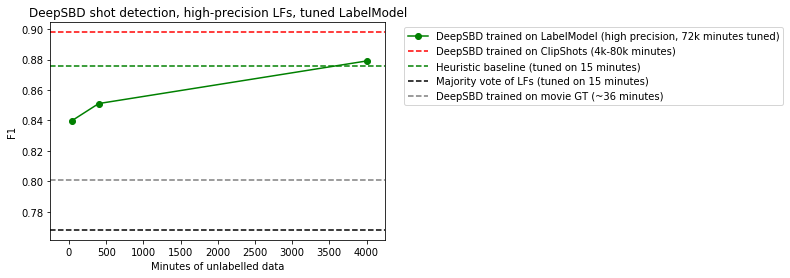

In [185]:
fig, ax = plt.subplots()
# ax.plot(X_1, Y_1, label=label_1, marker='o', color='tab:blue')
# ax.axhline(label_model_1[0], linestyle = '--', color='tab:blue', label=label_model_1[1])

# ax.plot(X_2, Y_2, label=label_2, marker='o', color='tab:purple')
# ax.axhline(label_model_2[0], linestyle = '--', color='tab:purple', label=label_model_2[1])

# ax.plot(X_3, Y_3, label=label_3, marker='o', color='tab:orange')
# ax.axhline(label_model_3[0], linestyle = '--', color='tab:orange', label=label_model_3[1])

ax.plot(X_4, Y_4, label=label_4, marker='o', color='g')

ax.axhline(resnet_trained_clipshots, linestyle = '--', color='r',
           label='DeepSBD trained on ClipShots (4k-80k minutes)')
ax.axhline(heuristic_F1, linestyle = '--', color='g',
          label='Heuristic baseline (tuned on 15 minutes)')
ax.axhline(.768, linestyle = '--', color='k',
          label='Majority vote of LFs (tuned on 15 minutes)')
# ax.axhline(labelmodel, linestyle = '--', color='purple',
#           label='LabelModel (4,000 minutes)')
# ax.axhline(resnet_trained_gt, linestyle = '--', color='orange',
#           label='DeepSBD trained on movie GT (~36 minutes)')
ax.axhline(resnet_trained_gt, linestyle = '--', color='tab:gray',
          label='DeepSBD trained on movie GT (~36 minutes)')

ax.set_xlabel('Minutes of unlabelled data')
ax.set_ylabel('F1')
ax.set_xlim(left = -250, right = 4250)
# ax.set_xscale("log", nonposy='clip')
ax.legend(bbox_to_anchor=(1.04,1), loc="upper left")
#     ax.set_xlim(left=0)
ax.set_title('DeepSBD shot detection, high-precision LFs, tuned LabelModel')